# Project 3

In [13]:
import pokebase as pb
pb.cache.API_CACHE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
fireTypePokemon = pb.APIResource('type', 'fire').pokemon
dfFire = {
    'name': [],
    'weight': [],
    'height': [],
    # 'moves': [],
    }
dfMoves = {
    'pokemon': [],
    'move': [],
}
for pokemon in fireTypePokemon[:10]:
    dfFire['name'].append(pokemon.pokemon.name)
    # display(pb.APIResource('pokemon', pokemon.pokemon.name).weight)
    dfFire['weight'].append(pokemon.pokemon.weight)
    dfFire['height'].append(pokemon.pokemon.height)
    for move in pokemon.pokemon.moves:
        dfMoves['pokemon'].append(pokemon.pokemon.name)
        dfMoves['move'].append(move.move.name)
    # display(pokemon.pokemon.name)
    break
# display(move for move in dfFire['moves'])
# for move in dfFire['moves'][0]:
#     display(move.move.name)
dfFire
display(pd.DataFrame(dfFire))
display(pd.DataFrame(dfMoves))
# pb.pokemon()

,name,weight,height
0,charmander,85,6


,pokemon,move
0,charmander,mega-punch
1,charmander,fire-punch
2,charmander,thunder-punch
3,charmander,scratch
4,charmander,swords-dance
...,...,...
100,charmander,confide
101,charmander,power-up-punch
102,charmander,breaking-swipe
103,charmander,tera-blast


In [15]:
gen1 = pb.generation('generation-1')
dir(gen1)
bulbasaur = gen1.results[0].pokemon_species[0]
bulbasaur.gender_rate
# dfFire = {
#     'name': [],
#     'weight': [],
#     'height': [],
#     # 'moves': [],
#     }
# dfMoves = {
#     'pokemon': [],
#     'move': [],
# }
# for pokemon in fireTypePokemon[:10]:
#     dfFire['name'].append(pokemon.pokemon.species)
#     # display(pb.APIResource('pokemon', pokemon.pokemon.name).weight)
#     dfFire['weight'].append(pokemon.pokemon.weight)
#     dfFire['height'].append(pokemon.pokemon.height)
#     for move in pokemon.pokemon.moves:
#         dfMoves['pokemon'].append(pokemon.pokemon.name)
#         dfMoves['move'].append(move.move.name)
#     # display(pokemon.pokemon.name)
#     break
# # display(move for move in dfFire['moves'])
# # for move in dfFire['moves'][0]:
# #     display(move.move.name)
# dfFire
# display(pd.DataFrame(dfFire))
# display(pd.DataFrame(dfMoves))
# # pb.pokemon()

1

In [16]:
gen1 = pb.generation(1).pokemon_species
bulbasaur = gen1[0]
bulbasaur.name
fireTypePokemon = pb.APIResource('type', 'fire').pokemon
dfFire = {
    'species': [],
    # 'weight': [],
    # 'height': [],
    # 'moves': [],
    }
# dfMoves = {
#     'pokemon': [],
#     'move': [],
# }
for pokemon in fireTypePokemon:
    dfFire['species'].append(pokemon.pokemon.species.name)
    break
pd.DataFrame(dfFire)


SyntaxError: '(' was never closed (<unknown>, line 1)

### Ideas

* Pokemon weights/heights by type
* Popularity of types introduced per generation
* Specific stats compared to type (HP, Attack, etc)

Pokemon Speeds by Type

,Type,Speed
0,Grass,45
1,Grass,60
2,Grass,80
3,Fire,65
4,Fire,80


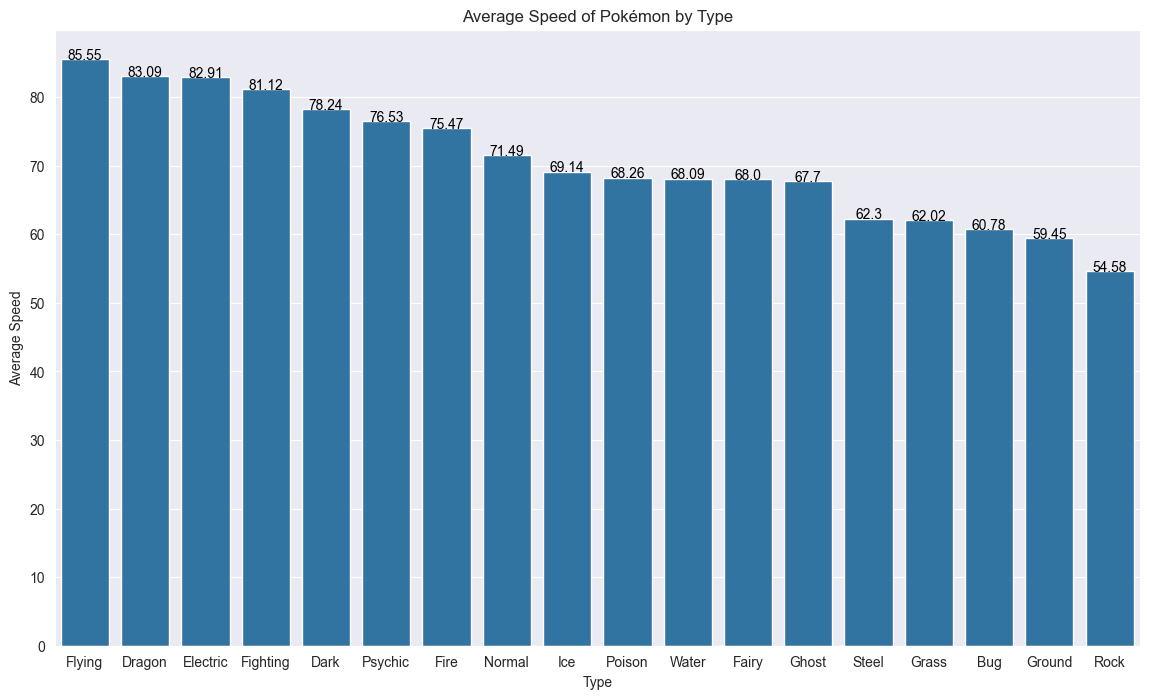

C:\Users\caden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


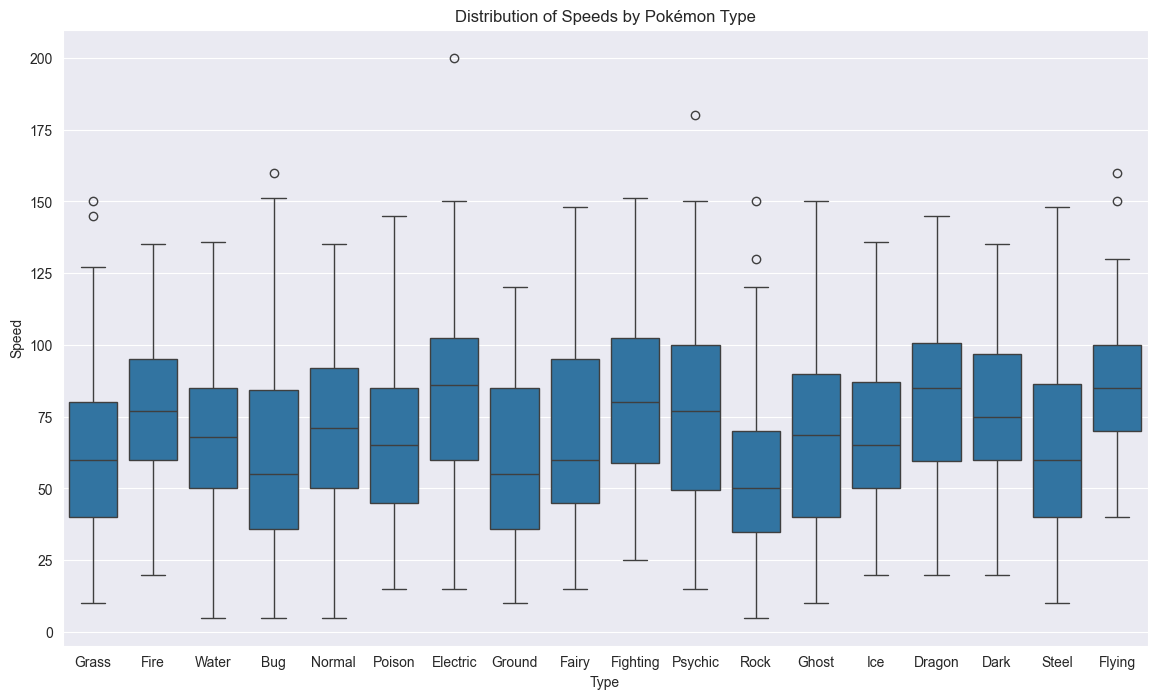

In [ ]:
# display(pb.pokemon(1).types[0].type.name) 

# Load the dataset
pokemon_df = pd.read_csv('Pokemon.csv')

# Consolidate each Pokemon's types and speed
type1_df = pokemon_df[['Type1', 'Speed']].rename(columns={'Type1': 'Type'}) # Pokemon with one type
type2_df = pokemon_df[pokemon_df['Type2'].notnull() & (pokemon_df['Type2'] != ' ') & (pokemon_df['Type2'] != '0')][['Type2', 'Speed']].rename(columns={'Type2': 'Type'})
all_types_speed_df = pd.concat([type1_df, type2_df])
display(all_types_speed_df.head())
average_speed_by_type = all_types_speed_df.groupby('Type').mean().sort_values(by='Speed', ascending=False) # Calculate the average speed for each type

# sns.set_style('darkgrid')

# Bar Chart for Average Speed of Pokémon by Type
plt.figure(figsize=(14, 8))
bar_chart = sns.barplot(x=average_speed_by_type.index, y="Speed", data=average_speed_by_type.reset_index())

for index, value in enumerate(average_speed_by_type['Speed']): # Add the average speed value on top of each bar
    bar_chart.text(index, value, round(value, 2), color='black', ha="center")
    
plt.title('Average Speed of Pokémon by Type')
plt.ylabel('Average Speed')
plt.xlabel('Type')
plt.show()

# Box Plot for Distribution of Speeds by Pokémon Type
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='Type', y='Speed', data=all_types_speed_df)
plt.title('Distribution of Speeds by Pokémon Type')
plt.ylabel('Speed')
plt.xlabel('Type')
plt.show()

Average weight for type normal: 632.9556962025316
Average weight for type fighting: 1209.2
Average weight for type flying: 666.6174496644295
Average weight for type poison: 926.6274509803922
Average weight for type ground: 1548.3870967741937
Average weight for type rock: 1200.0294117647059
Average weight for type bug: 643.0096153846154
Average weight for type ghost: 693.445652173913
Average weight for type steel: 2199.989010989011
Average weight for type fire: 1170.0
Average weight for type water: 921.5430107526881
Average weight for type grass: 621.296052631579
Average weight for type electric: 837.3
Average weight for type psychic: 971.4485294117648
Average weight for type ice: 1536.7121212121212
Average weight for type dragon: 2121.766355140187
Average weight for type dark: 989.7978723404256
Average weight for type fairy: 625.8795180722891